In [4]:
import psutil
import pandas as pd
import datetime
import time
import random

In [5]:
# Settings
duration_hours = 250  # Increase this for more data
sampling_rate_hz = 10
num_samples = duration_hours * 60 * 60 * sampling_rate_hz

In [6]:
timestamps = []
cpu_temperatures = []
cpu_usages = []
cpu_loads = []
memory_usages = []
battery_levels = []
cpu_powers = []

In [8]:
# Generate synthetic data
for i in range(num_samples):
    current_time = datetime.datetime.now() + datetime.timedelta(seconds=i / sampling_rate_hz)
    timestamps.append(current_time)

    # Randomly generate values
    cpu_temp = random.uniform(30, 90)
    cpu_usage = random.uniform(0, 100)
    cpu_load = random.uniform(0, 10)
    memory_usage = random.uniform(10, 90)
    battery_level = random.uniform(20, 100)
    cpu_power = random.uniform(10, 50)

    # Introduce anomalies
    if random.random() < 0.1:
        cpu_usage = random.uniform(90, 100)
    if random.random() < 0.05:
        cpu_temp = random.uniform(90, 105)
    if random.random() < 0.05:
        memory_usage = random.uniform(95, 100)
    if random.random() < 0.03:
        battery_level = random.uniform(0, 10)
    if random.random() < 0.02:
        cpu_power = random.uniform(50, 100)

    # Append data
    cpu_temperatures.append(cpu_temp)
    cpu_usages.append(cpu_usage)
    cpu_loads.append(cpu_load)
    memory_usages.append(memory_usage)
    battery_levels.append(battery_level)
    cpu_powers.append(cpu_power)

In [9]:
# Create DataFrame
data = {
    'timestamp': timestamps,
    'cpu_temperature': cpu_temperatures,
    'cpu_usage': cpu_usages,
    'cpu_load': cpu_loads,
    'memory_usage': memory_usages,
    'battery_level': battery_levels,
    'cpu_power': cpu_powers,
}
df = pd.DataFrame(data)

In [10]:
# Save to CSV
file_path = 'synthetic_data.csv'
df.to_csv(file_path, index=False)
print(f"Data saved to {file_path}")

Data saved to synthetic_data.csv


In [17]:
# Get the memory usage of the DataFrame in bytes
memory_usage_bytes = df.memory_usage(deep=True).sum()

# Convert bytes to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print(f"Dataset size: {memory_usage_gb:.2f} GB")

Dataset size: 1.48 GB


<h1>Anomaly Detection and Visualization</h1>

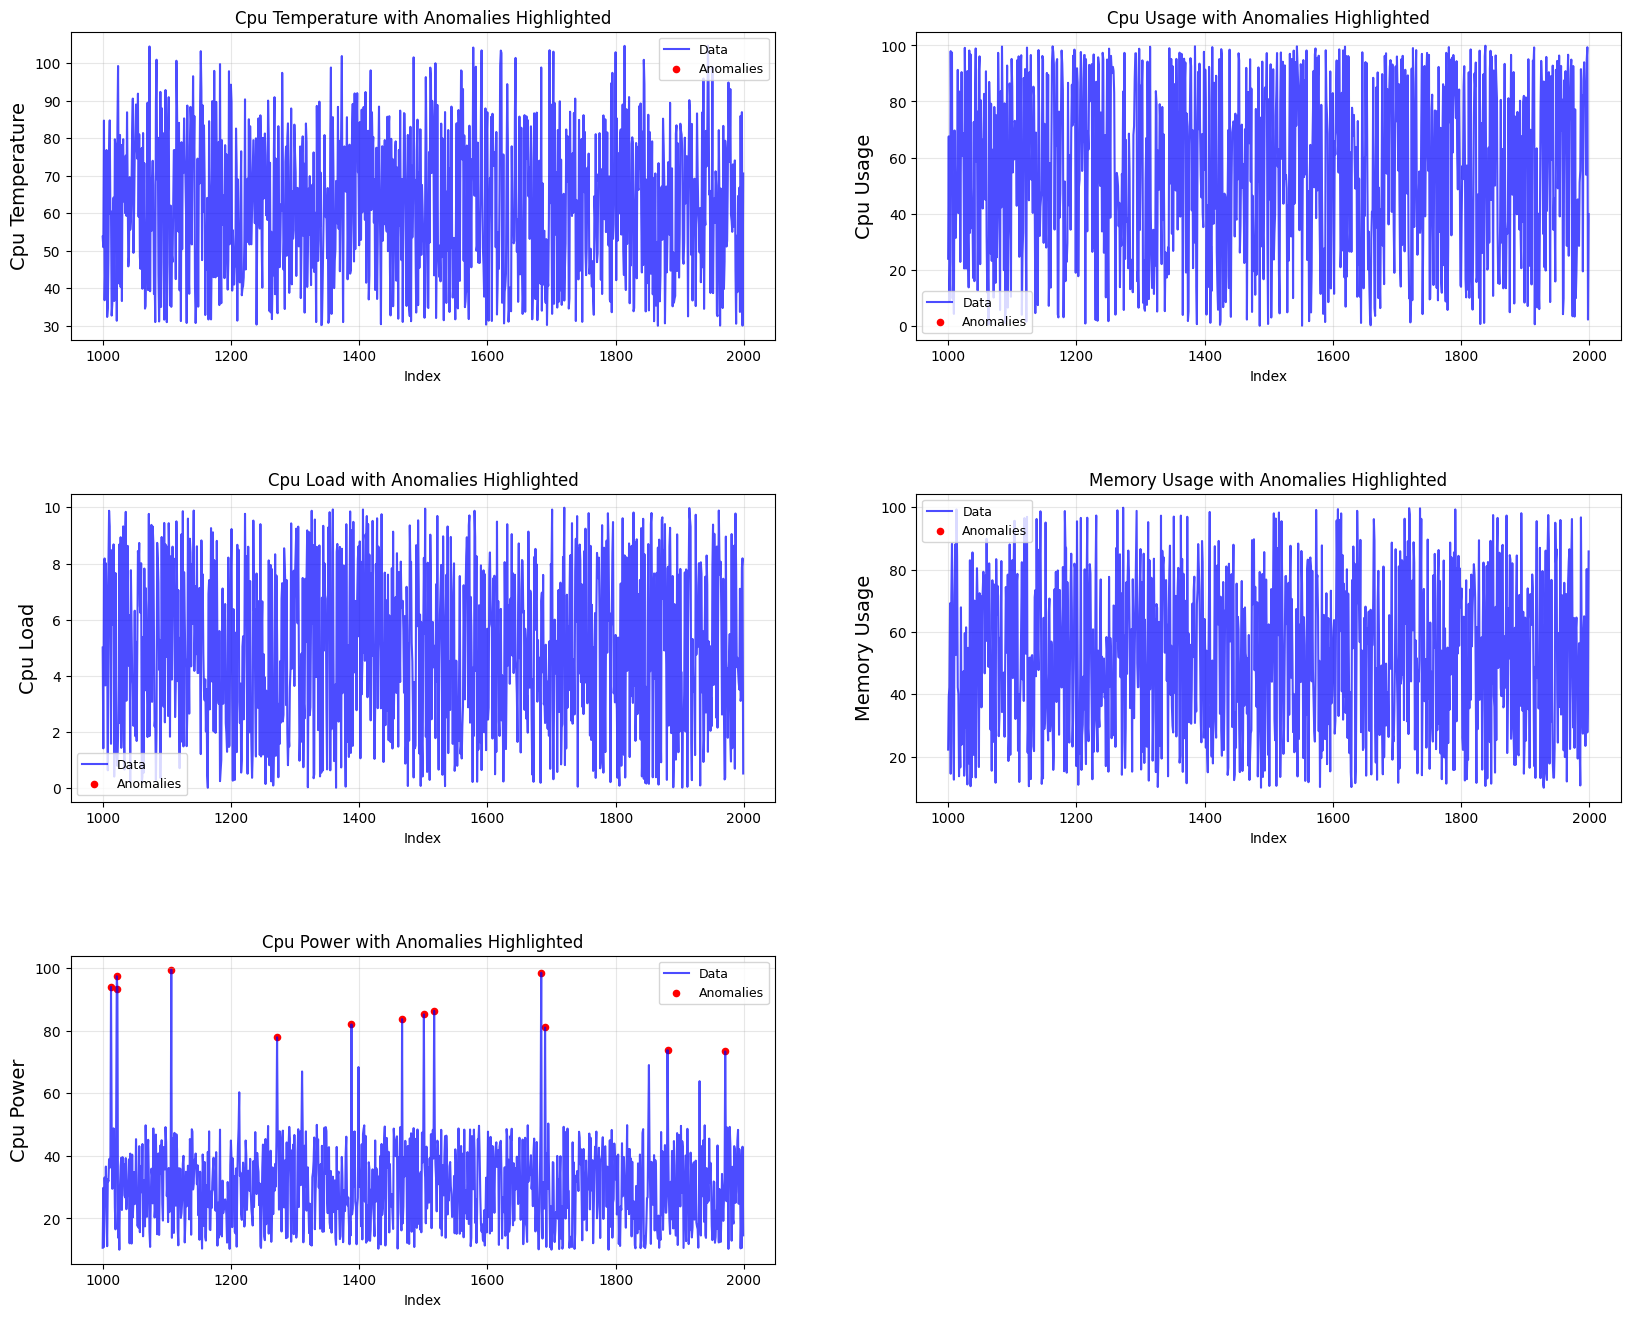

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming already created and saved)
file_path = 'synthetic_data.csv'
df = pd.read_csv(file_path)

# Define the anomaly detection function using Z-Score
def detect_anomalies(df, column):
    df[f'{column}_zscore'] = (df[column] - df[column].mean()) / df[column].std()
    df[f'{column}_anomaly'] = df[f'{column}_zscore'].abs() > 3  # Anomalies > 3 std deviations
    return df

# Apply anomaly detection to relevant columns
columns_to_check = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']
for col in columns_to_check:
    df = detect_anomalies(df, col)

# Limit to a subset of rows for visualization (e.g., 1000-2000)
df_subset = df.iloc[1000:2000]

# Create subplots for each metric
fig, axs = plt.subplots(3, 2, figsize=(20, 16))  # Increased figsize for larger graphs
fig.subplots_adjust(hspace=0.5)  # Adjust space between subplots

metrics = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']
titles = [
    'Cpu Temperature with Anomalies Highlighted',
    'Cpu Usage with Anomalies Highlighted',
    'Cpu Load with Anomalies Highlighted',
    'Memory Usage with Anomalies Highlighted',
    'Cpu Power with Anomalies Highlighted',
]

for i, ax in enumerate(axs.flatten()[:len(metrics)]):  # Iterate through axes and metrics
    metric = metrics[i]
    title = titles[i]
    
    # Plot the metric data
    ax.plot(df_subset.index, df_subset[metric], label='Data', color='blue', alpha=0.7)
    ax.scatter(
        df_subset.index[df_subset[f'{metric}_anomaly']],
        df_subset[metric][df_subset[f'{metric}_anomaly']],
        color='red',
        label='Anomalies',
        s=20
    )
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Index', fontsize=10)
    ax.set_ylabel(metric.replace('_', ' ').title(), fontsize=14)  # Increased fontsize for y-axis labels
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3)

# Remove empty subplot if fewer metrics
if len(metrics) % 2 != 0:
    axs[-1, -1].axis('off')

plt.show()
